<a href="https://colab.research.google.com/github/Vidhuran-Rajendran/NYC-Taxi-Trip-Time-Prediction---Capstone-Project_2/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [3]:
file='/content/drive/MyDrive/Colab Notebooks/ALma better/Capstone project/Capstoen_2/NYC Taxi Data.csv'
data=pd.read_csv(file)
data1=data.copy()

In [4]:
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
data1.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
data1.shape

(1458644, 11)

In [8]:
data1.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
data1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
print(data1.nunique().sort_values())

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


[Text(0, 0.5, 'mean'),
 Text(0, 1.5, 'std'),
 Text(0, 2.5, 'min'),
 Text(0, 3.5, '25%'),
 Text(0, 4.5, '50%'),
 Text(0, 5.5, '75%'),
 Text(0, 6.5, 'max')]

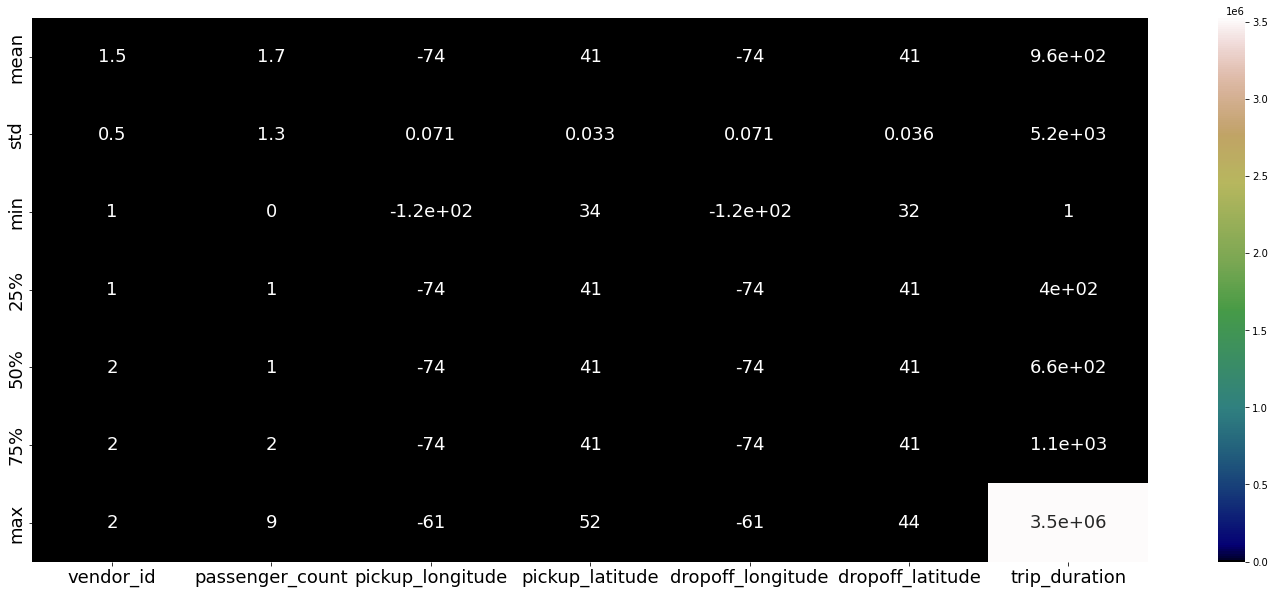

In [11]:
plt.figure(figsize=(25,10))
svm=sns.heatmap(data1.describe()[1:],annot=True,cmap='gist_earth',annot_kws={'size':18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize=18)
svm.set_yticklabels(svm.get_ymajorticklabels(),fontsize=18)

In [12]:
data1['pickup_datetime']=pd.to_datetime(data1['pickup_datetime'])
data1['dropoff_datetime']=pd.to_datetime(data1['dropoff_datetime'])

In [13]:
# extracting further information from datetime feature
data1['pickup_day']=data1['pickup_datetime'].dt.day
data1['pickup_month']=data1['pickup_datetime'].dt.month
data1['pickup_weekday']=data1['pickup_datetime'].dt.weekday
data1['pickup_hour']=data1['pickup_datetime'].dt.hour
data1['pickup_date']=data1['pickup_datetime'].dt.date
data1['pickup_min']=data1['pickup_datetime'].dt.minute
data1['dropoff_min'] = data1['dropoff_datetime'].dt.minute

In [14]:
from geopy.distance import great_circle

In [15]:
def distance_calc(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)

  return great_circle(start_coordinates,stop_coordinates).km


In [16]:
data1['distance']=data1.apply(lambda x:distance_calc(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [17]:
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_date,pickup_min,dropoff_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,0,17,2016-03-14,24,32,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,2016-06-12,43,54,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,2016-01-19,35,10,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,2,19,2016-04-06,32,39,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,5,13,2016-03-26,30,38,1.188590


In [18]:
data1.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


Text(0.5, 1.0, 'vendor_id')

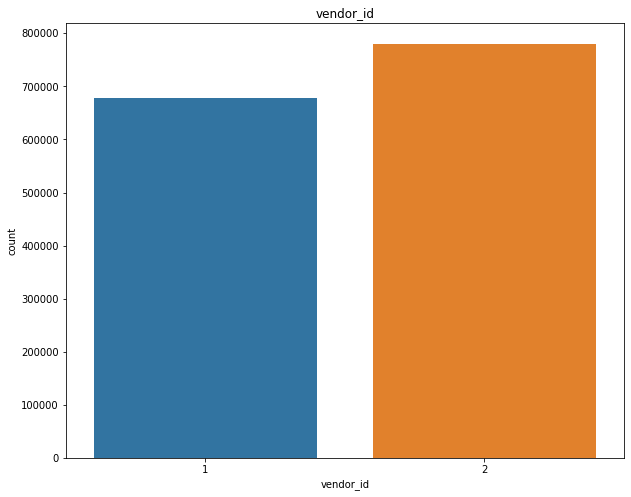

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data1['vendor_id'])
plt.title('vendor_id')

Text(0.5, 1.0, 'store_and_fwd_flag')

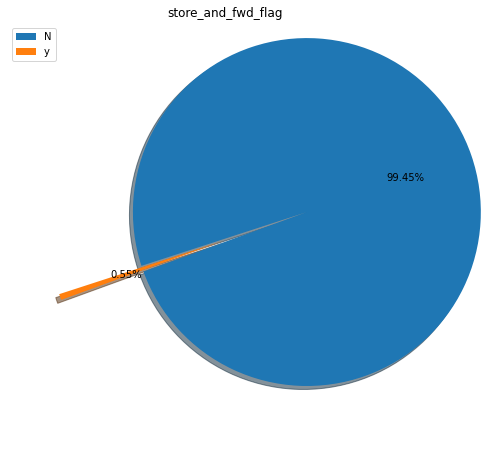

In [20]:
plt.figure(figsize=(10,8))
plt.pie(data1['store_and_fwd_flag'].value_counts(),autopct='%1.2f%%', startangle=200,shadow=True, explode=[0.5,0])
plt.legend(labels=['N','y'])
plt.title('store_and_fwd_flag')

In [21]:
data1['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

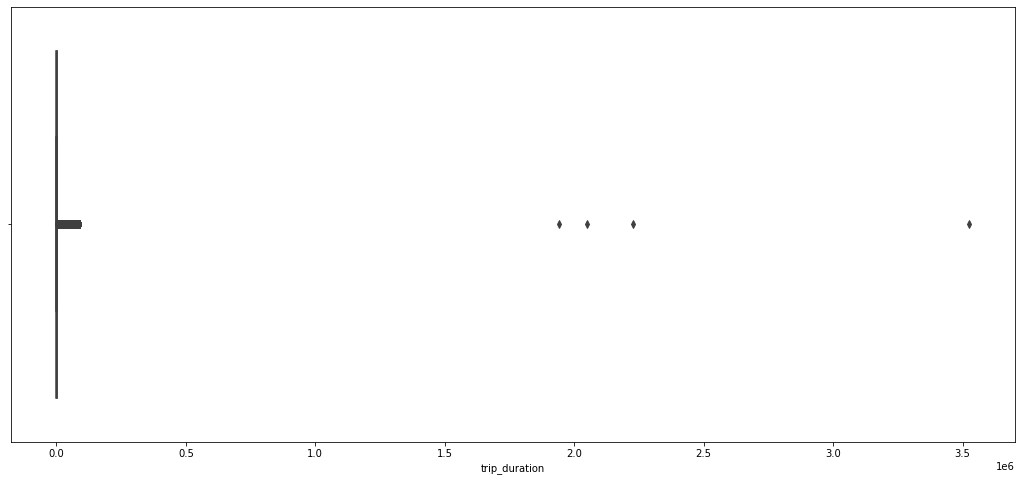

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(data1['trip_duration'])

In [23]:
data1['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1034341          1
346102           1
1360664          1
1382872          1
207497           1
Name: trip_duration, Length: 1458644, dtype: int64

In [24]:
data1.drop(data1[data1['trip_duration']>=1939736].index,inplace=True)

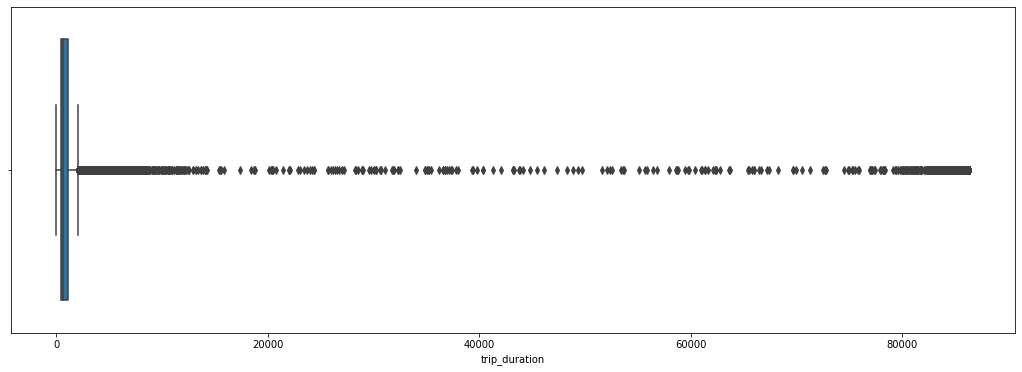

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data1['trip_duration'])

Text(0.5, 1.0, 'passenger_count')

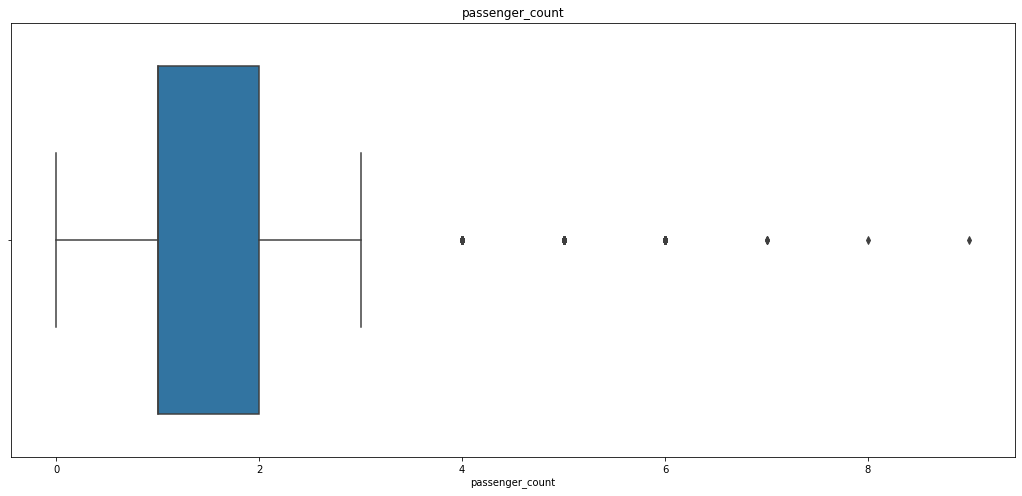

In [26]:
plt.figure(figsize=(18,8))
sns.boxplot(data1['passenger_count'])
plt.title('passenger_count')

In [27]:
data1['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [28]:
data1=data1[data1['passenger_count']>0]
data1=data1[data1['passenger_count']<=6]

In [29]:
data1['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

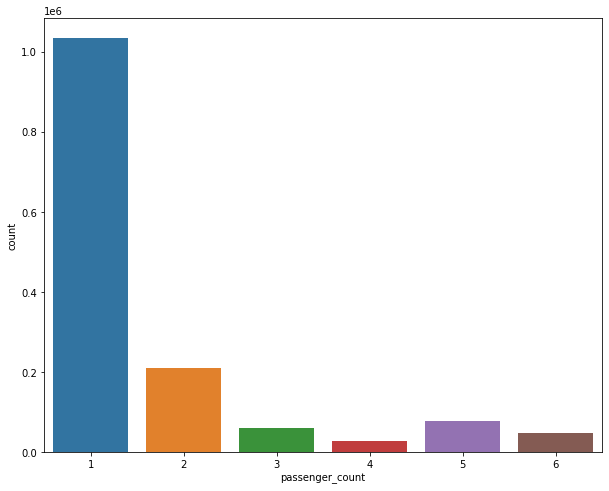

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data1['passenger_count'])


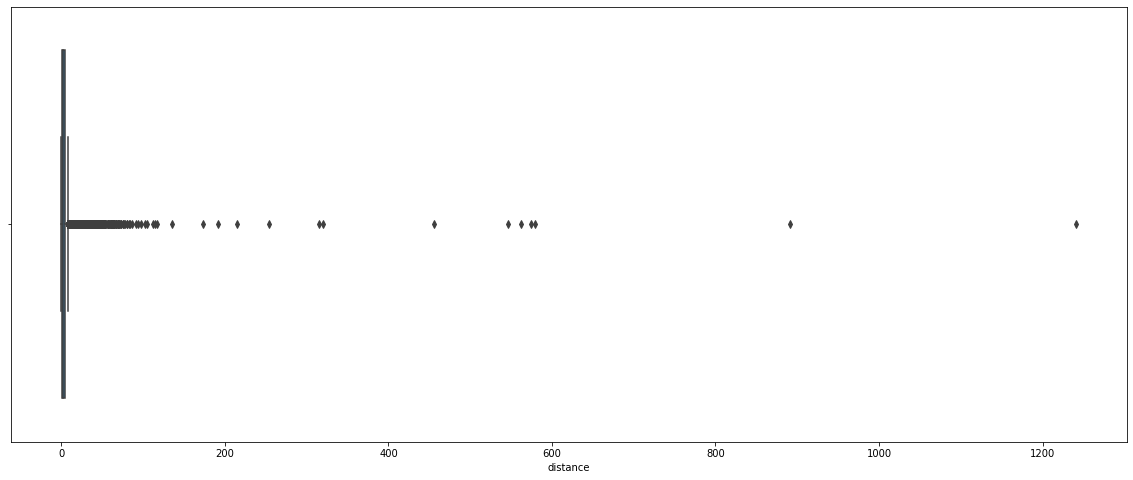

In [31]:
plt.figure(figsize=(20,8))
sns.boxplot(data1.distance)
plt.show()

Text(0.5, 1.0, 'Overall week days trips')

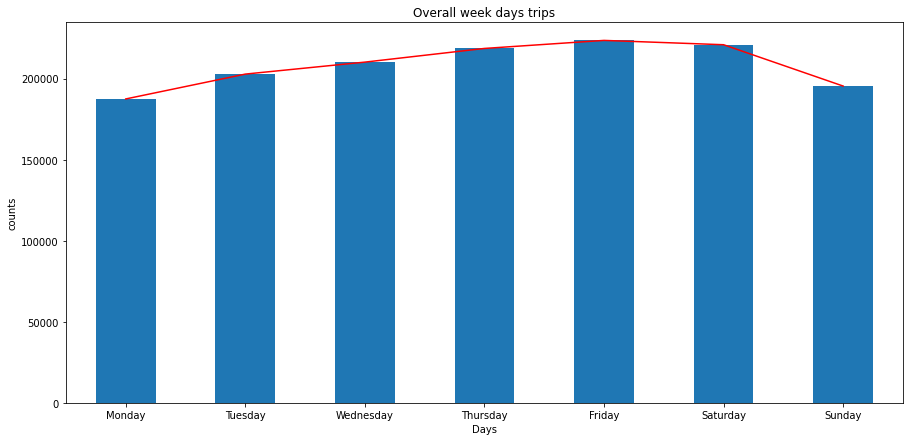

In [32]:
plt.figure(figsize=(15,7))
week=data1['pickup_weekday'].value_counts().sort_index()
week.plot(kind='bar')
week.plot(kind='line',color='red')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Days')
plt.ylabel('counts')
plt.title('Overall week days trips')

Text(0.5, 1.0, 'Hourly Picukps')

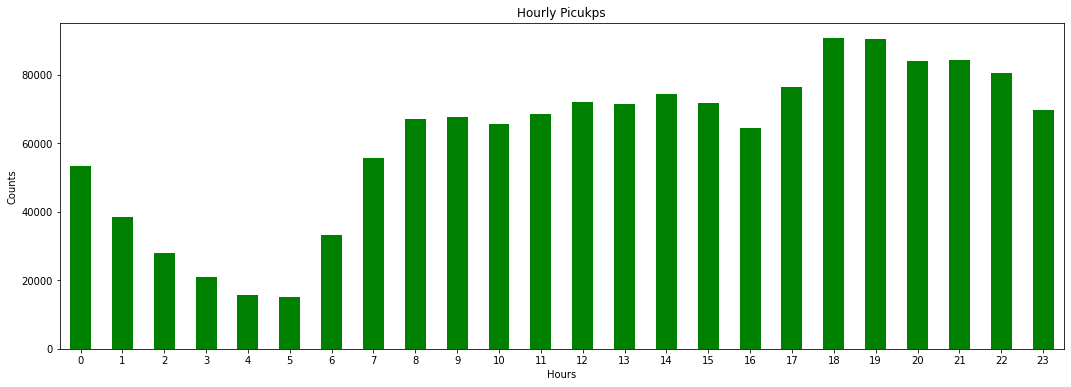

In [33]:
plt.figure(figsize=(18,6))
hour=data1['pickup_hour'].value_counts().sort_index()
hour.plot(kind='bar',color='green')
plt.xticks(rotation=0)
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.title('Hourly Picukps')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

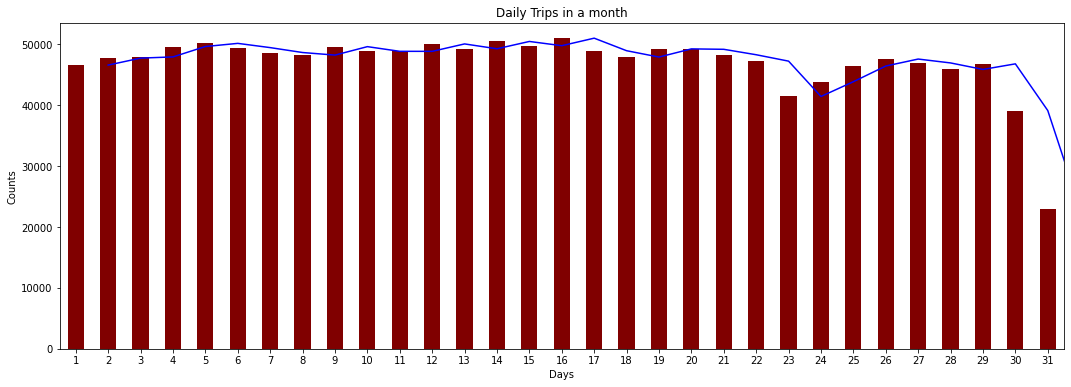

In [34]:
# analysing daily trips in month
plt.figure(figsize=(18,6))
days=data1['pickup_day'].value_counts().sort_index()
days.plot(kind='bar',color='maroon')
days.plot(kind='line',color='blue')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Daily Trips in a month')
plt.xticks(rotation=0)




Text(0.5, 1.0, 'Overall Monthly trips')

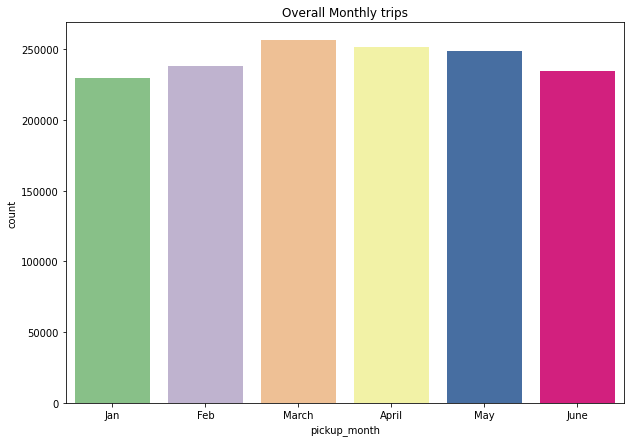

In [35]:
## monthly trips exploration
plt.figure(figsize=(10,7))
sns.countplot(data1['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Overall Monthly trips')

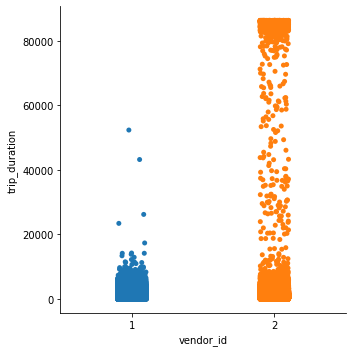

In [36]:
sns.catplot(x='vendor_id',y='trip_duration',data=data1)



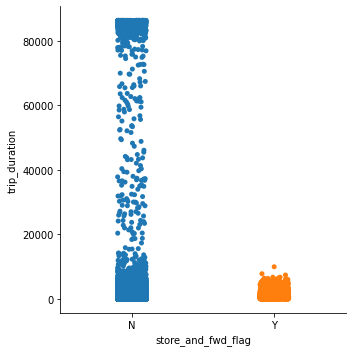

In [37]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data1, kind='strip')

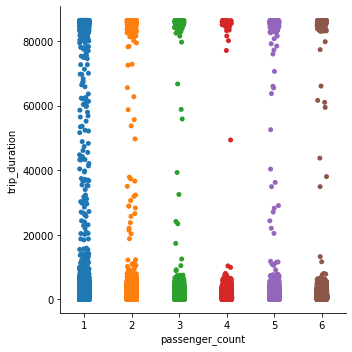

In [38]:
sns.catplot(y='trip_duration',x='passenger_count',data=data1,kind='strip')

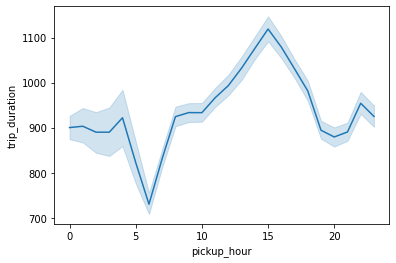

In [39]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data1)

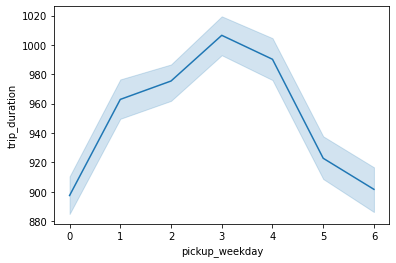

In [40]:
# Trip Duration per Day of Week
sns.lineplot(x='pickup_weekday',y='trip_duration',data=data1)

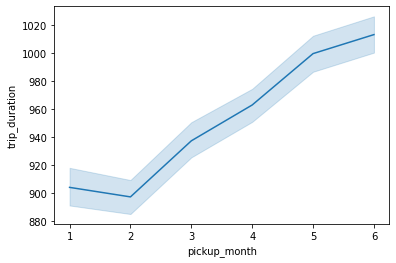

In [41]:
# Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=data1)

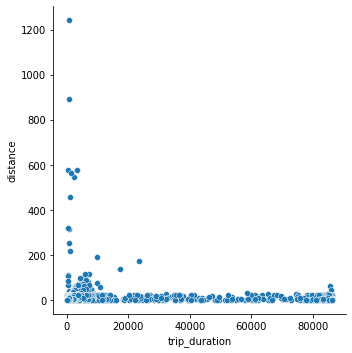

In [42]:
# distance relation with trip duration
sns.relplot(y=data1.distance,x='trip_duration',data=data1)

In [43]:
data1[data1['distance']==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,29,2,0,18,2016-02-29,39,42,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,10,5,1,18,2016-05-10,7,26,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,16,5,0,23,2016-05-16,15,31,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,25,1,0,19,2016-01-25,45,54,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,27,1,2,22,2016-01-27,29,29,0.0


In [44]:
#categorical values label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data1['store_and_fwd_flag']=encoder.fit_transform(data1['store_and_fwd_flag'])
data1['vendor_id']=encoder.fit_transform(data1['vendor_id'])

Text(0.5, 1.0, 'correlation plot')

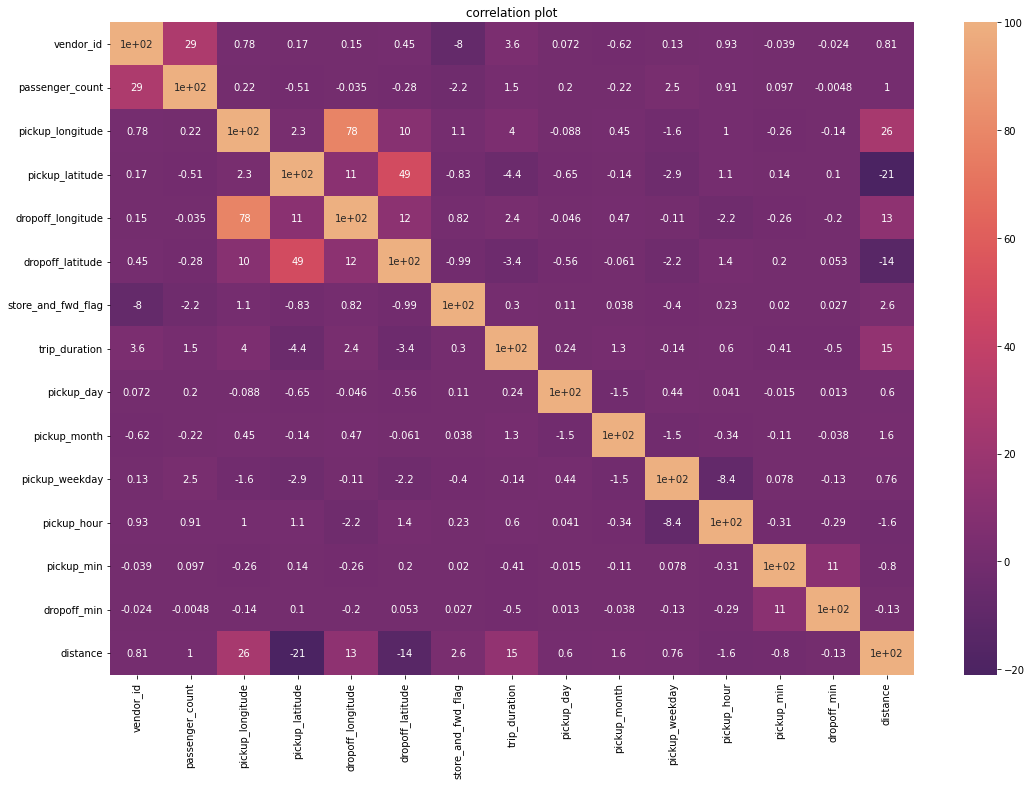

In [56]:
# plotting pearson correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(data1.corr()*100,annot=True,cmap='flare_r')
plt.title('correlation plot')

In [57]:
# dropping some unnecessary columns
nyc_taxi_df = data1.drop(['id','pickup_datetime','pickup_date','dropoff_datetime','distance'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_min,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,0,17,24,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,6,0,43,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,1,11,35,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2,19,32,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,5,13,30,38


In [58]:
nyc_taxi_df.shape

(1458575, 14)

In [59]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration']) 

In [60]:
# scaling predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)


Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'pickup_min', 'dropoff_min'],
      dtype='object')


In [62]:
scaler = StandardScaler() # creating instance for scaler

In [64]:
df = scaler.fit_transform(X)
df.shape

(1458575, 13)

In [65]:
df = pd.DataFrame(df, columns=cols)
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_min,dropoff_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-0.172829,-0.307453,-1.561057,0.530258,-0.322670,0.136133
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,-0.402632,1.477163,1.509521,-2.126171,0.774026,1.399030
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,0.401676,-1.497197,-1.049294,-0.407305,0.312259,-1.126764
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,-1.092039,0.287419,-0.537531,0.842779,0.139097,0.537964
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,1.205984,-0.307453,0.997758,-0.094784,0.023655,0.480560


In [66]:
X = df

In [68]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14410085, 0.10874172, 0.10046688, 0.08575395, 0.0832723 ,
       0.0781244 , 0.07600664, 0.07577636, 0.07020669, 0.06811242,
       0.05427187, 0.03908667, 0.01607925])

<BarContainer object of 13 artists>

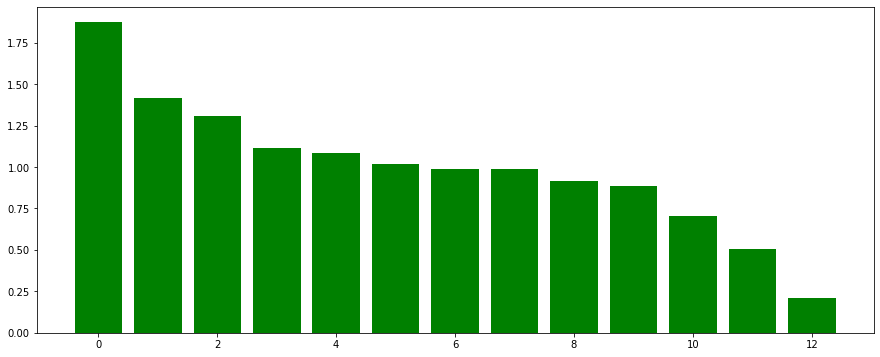

In [69]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="green")

Text(0.5, 1.0, 'Elbow Plot')

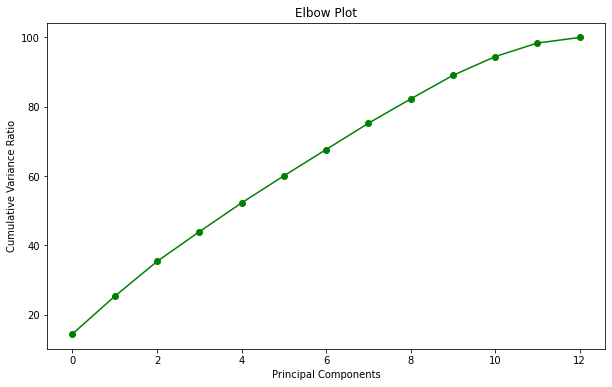

In [70]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [71]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.87331234, 1.41364334, 1.30607029, 1.11480206, 1.08254064,
       1.01561787, 0.98808704, 0.98509339, 0.91268766, 0.88546204,
       0.70553479, 0.508127  ])

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

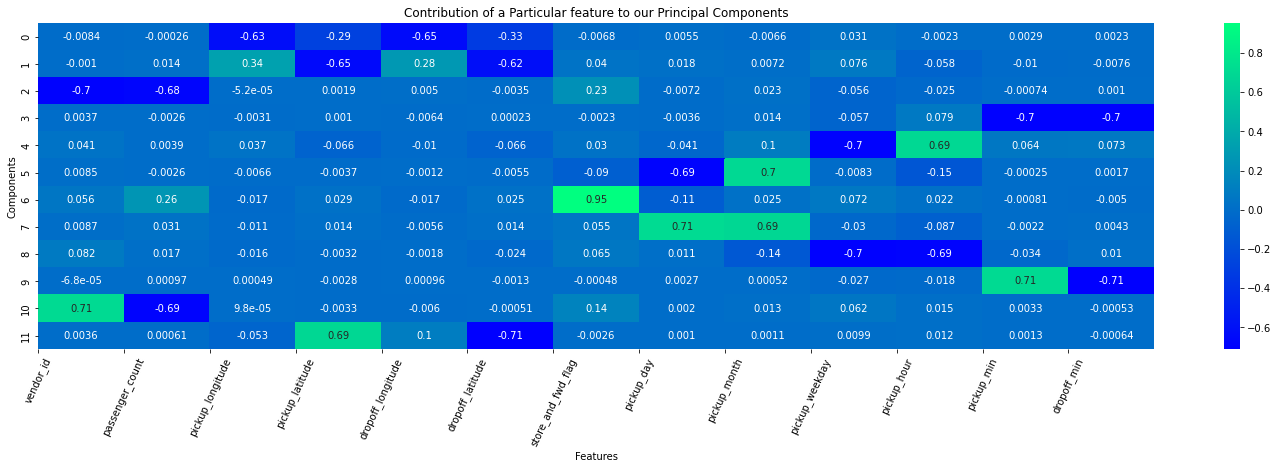

In [72]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

In [73]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

In [74]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

In [75]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.6058693 , 6.72521658, 6.34476199, ..., 6.56803122, 6.35736646,
       6.41334809])

In [76]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.4643878071917475,
 array([-0.00530276,  0.11235367, -0.0143169 ,  0.00897244,  0.05240373,
         0.01512746,  0.00881499,  0.02780677, -0.00696662, -0.0033258 ,
         0.00254727, -0.01407368]))

In [77]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))
print ("Validation Score : ", est_lr.score(X_test, y_test))
print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.03893292105902613
Validation Score :  0.050963262590853375
Cross Validation Score :  0.03297851994928587
R2_Score :  -34.903769226131345


Text(0.5, 1.0, 'Test VS Prediction')

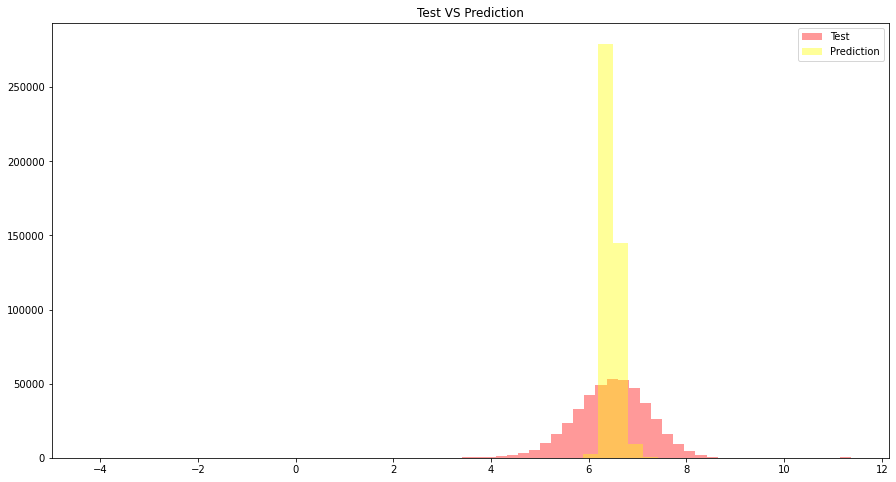

In [78]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="yellow", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [80]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([6.87055922, 8.21392426, 5.52795429, ..., 4.84334468, 6.74919318,
       6.75080428])

In [81]:
#examining metrics

print ("Training Score : " , dt.score(X_train, y_train))
print ("Validation Score : ",dt.score(X_test, y_test))
print ("Cross Validation Score : " , cross_val_score(dt, X_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(dt_pred, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.923820074172908
Validation Score :  0.9152943493866019
Cross Validation Score :  0.9160321091685347
R2_Score :  0.9079607736433695
RMSLE :  0.03871826295576983


Text(0.5, 1.0, 'Test VS Prediction')

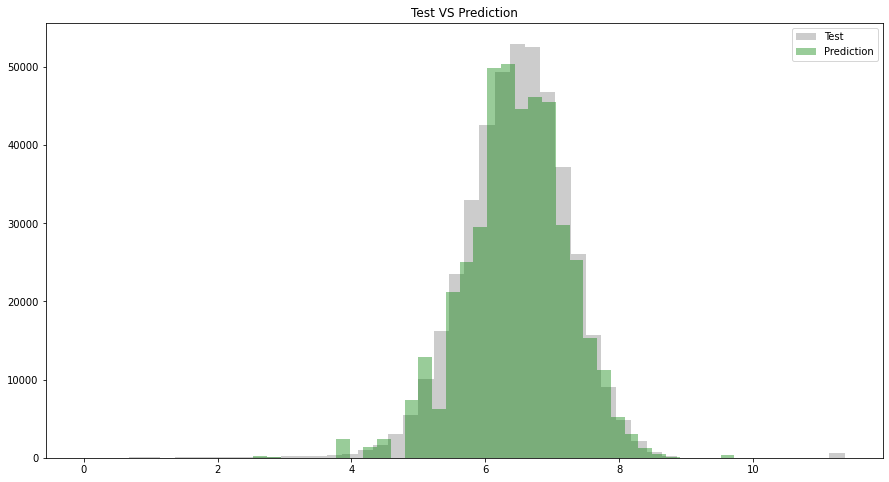

In [82]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")